# Introduction to Machine Learning with scikit-learn
## Lab 4: Clustering
The goal of this lab session is to discover a few clustering algorithms from scikit-learn. As for the classification and clustering labs, we will start with generated data to have a more visual idea of the results.
$$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$$

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### $k$-means algorithm
Let us start with the $k$-means algorithm. Remind that this algorithm takes the number of classes $k$ as a parameter and, given a set of $n$ points $X = \left\{ x_1, x_2, \dots, x_n \right\}$ aims at finding a partition $S = \left\{ S_1, S_2, \dots, S_k\right\}$ of $X$ minimizing the within-cluster sum of squares, that is:
$$\min_S \sum_{i = 1}^{k} \sum_{x \in S_i} \norm{x - \mu_i}_2^2$$
where 
$$\mu_i = \dfrac{1}{|S_i|} \sum_{x \in S_i} x$$
is the centroid (mean) of points in $S_i$ and $|S_i|$ is the cardinality of $S_i$. Recall that $\mu_i$ is not necessarily in $X$.

As we saw during the lecture, one of the ways to find the optimal partition $S$ is to iteratively apply following two steps:
- Define the **Voronoi diagram** generated by the $\mu_i$s:
$$S_i^t = \left\{ x_p \mid \norm{x - \mu_i^t} \leq \norm{x - \mu_j^t}, 1 \leq j \leq k \right\}$$
- Update the centroid:
$$\mu_i^{t+1} = \text{centroid}(S_i^t) = \dfrac{1}{S_i^t} \sum_{x \in S_i^t} x$$

for all $i \in \left\{ 1, \dots, k\right\}$

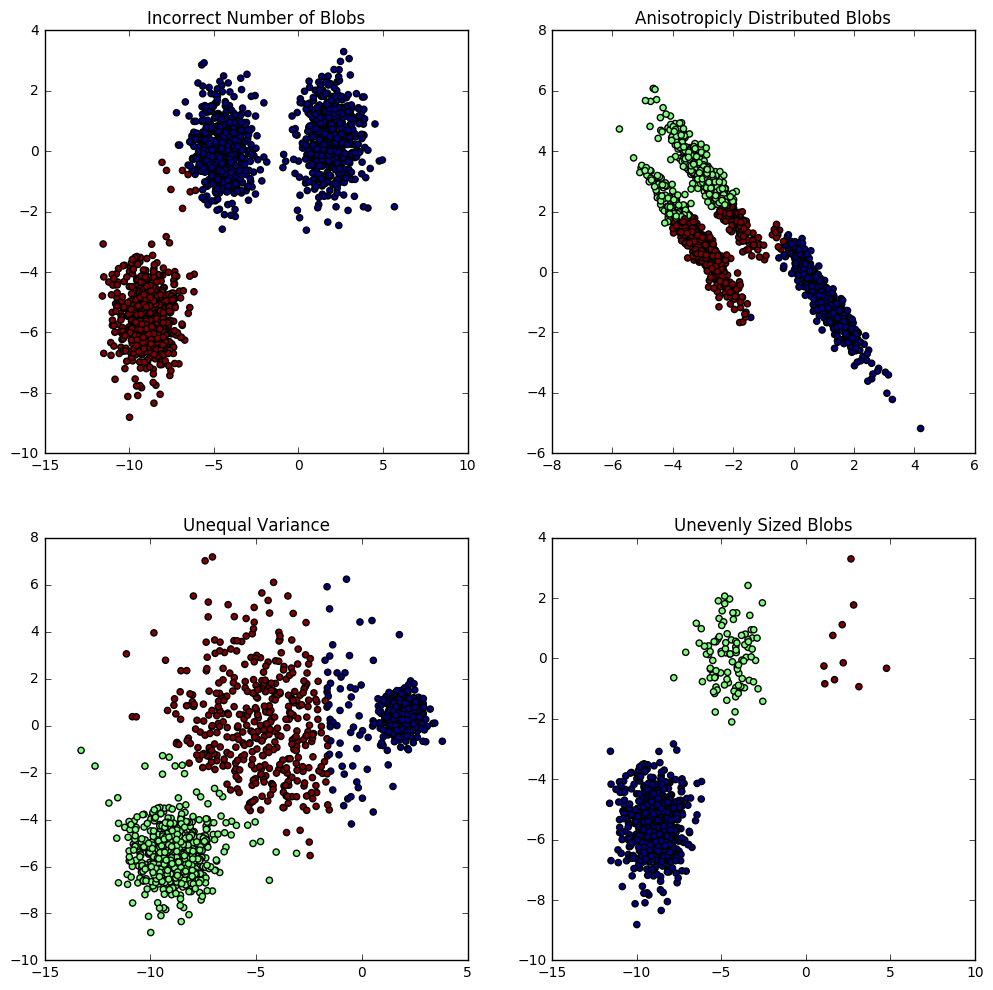

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()